# Costa Dynamic Production and BHP Data


### Load Python requirements

In [1]:
from pandas import DataFrame, read_csv

import altair as alt
#alt.renderers.enable('altair_viewer')


import pandas as pd
import numpy as np

alt.data_transformers.disable_max_rows()


file = r'./data/Costa_Dynamic_data.xlsx'
df = pd.read_excel(file,index_col=False)



### Data

In [2]:
df.head()

Well_Name       Date         GOR       BOEPD         BOPD          WCUT  \
0      HW-3 2020-02-01  731.414978  610.062571  5004.512533  4.268902e-07   
1      HW-3 2020-03-01  731.414978  630.383089  5171.207386  2.160302e-07   
2      HW-3 2020-04-01  731.414978  595.262798  4883.105894  1.379000e-07   
3      HW-3 2020-05-01  731.414978  608.989137  4995.706858  4.395115e-07   
4      HW-3 2020-06-01  731.414978  601.848873  4937.133294  1.006764e-06   

       BWPD          BHP  X_location  Y_location   KB  
0  0.002136  3274.055729       52211       84211  160  
1  0.001117  3237.286417       52211       84211  160  
2  0.000673  3221.117826       52211       84211  160  
3  0.002196  3196.397707       52211       84211  160  
4  0.004971  3187.041537       52211       84211  160

# This is what we do in Spotfire, and now we are trying to use Altair to do the same in python:

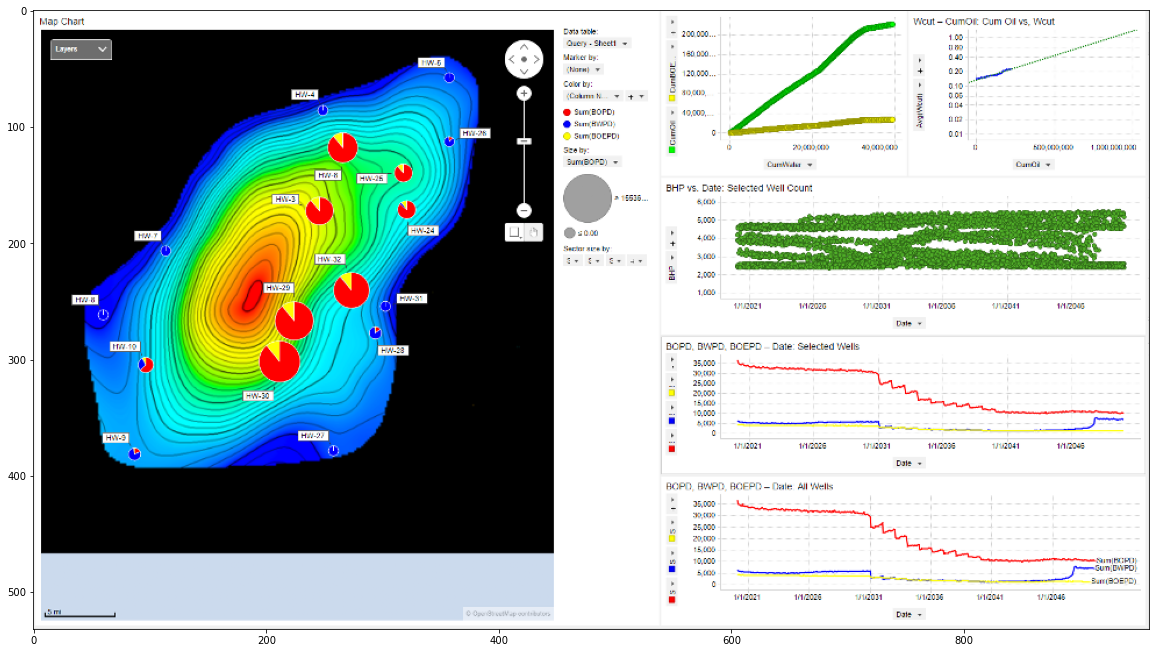

In [3]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg


plt.figure(figsize=(20,30))    
plt.imshow(mpimg.imread('Costa_Spotfire.png'))

## This is the structure map that we would like to get into the Altair Maps:

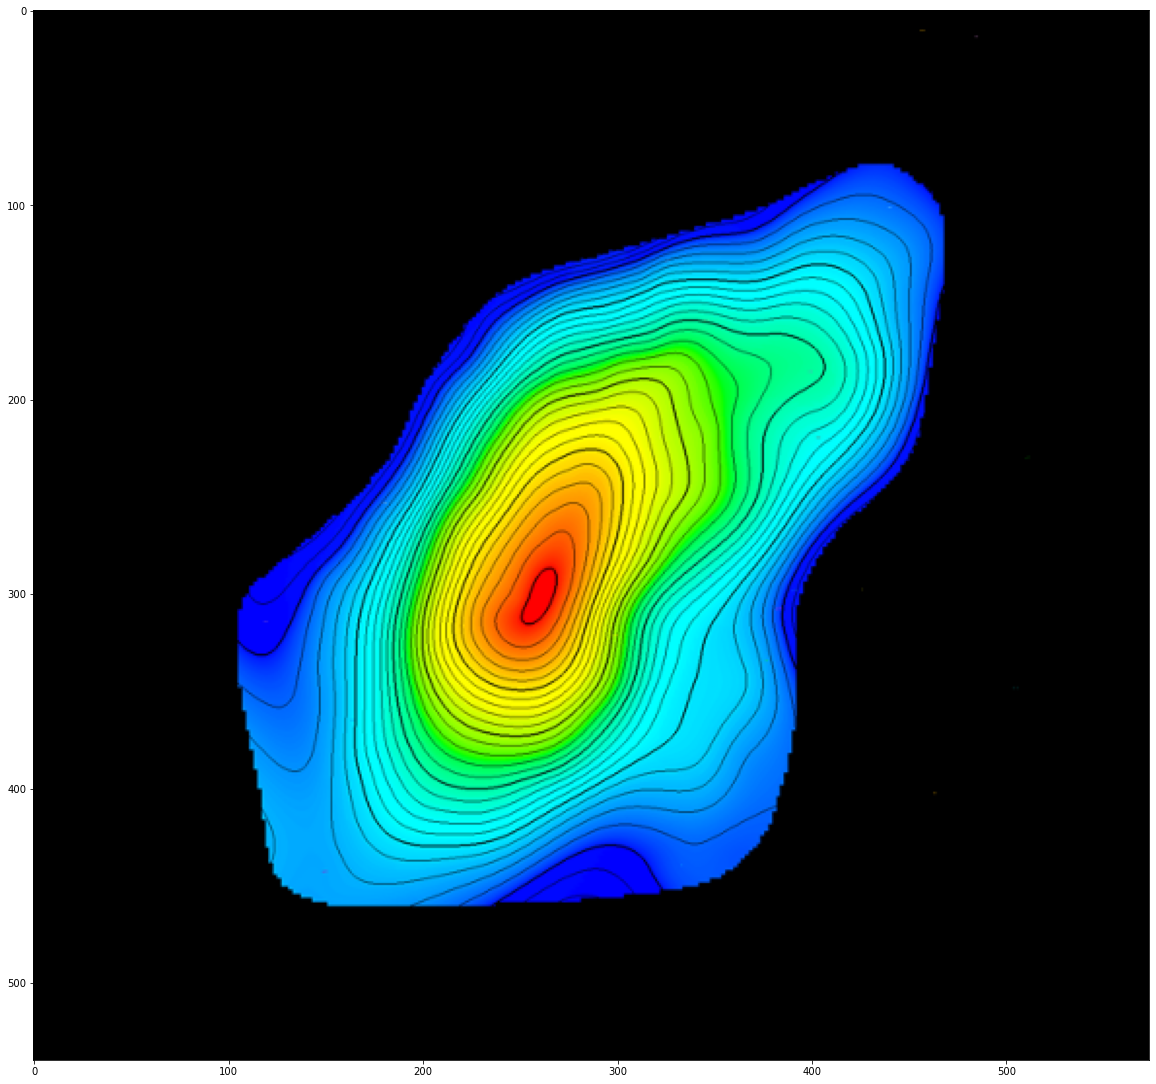

In [4]:
plt.figure(figsize=(20,30))    
plt.imshow(mpimg.imread('HW2_Top2.png'))

# Altair Basic Dynamic Data Plot:

In [5]:
interval = alt.selection_interval()


wells = alt.Chart(df).mark_point(filled=True).encode(
    alt.X('X_location:Q',
            scale=alt.Scale(domain=(25000, 70000))
        ),    
    alt.Y('Y_location',
            scale=alt.Scale(domain=(55000, 100000))),
    size=alt.Size('BOPD:Q', scale=alt.Scale(range=[10, 2000])),

    #color=alt.condition(interval, 'Well_Name', alt.value('lightgray')),
    color=alt.condition(interval, 'Well_Name', alt.value('lightgray'), legend=None),
    #color=alt.value('red'),
    
    tooltip='Well_Name', 
).properties(
    title='Costa Field Map Sized by BOPD',
    width=500,
    height=500, 
    selection=interval
#)

).add_selection(interval)
    


wells2 = alt.Chart(df).mark_point(filled=True).encode(
    alt.X('X_location:Q',
            scale=alt.Scale(domain=(25000, 70000))
        ),    
    alt.Y('Y_location',
            scale=alt.Scale(domain=(55000, 100000))),

    size=alt.Size('BWPD:Q', scale=alt.Scale(range=[10, 2000])),

    #color=alt.condition(interval, 'Well_Name', alt.value('lightgray')),
    #color=alt.condition(interval, 'Well_Name', alt.value('lightgray'), legend=None),
    #color=alt.condition(value('blue'), alt.value('lightgray'), legend=None),
    
    color=alt.value('blue'),
    
    tooltip='Well_Name', 
).properties(
    title='Costa Field Map Sized by BWPD',
    width=350,
    height=350,     
    selection=interval

).add_selection(interval)




timeseries = alt.Chart(df).mark_line(clip=True).encode(
    #alt.X('Date:T', timeUnit='year', axis=alt.Axis(title='')),
    x='Date:T',
    #y='sum(BOPD):Q',
    y=alt.Y('sum(BOPD):Q', scale=alt.Scale(domain=(0, 35000))),
    #color=alt.Color('Well_Name:O')
    color=alt.value('green'),
).properties(
    title='Sum of Production in BOPD (green), BOeGPD (orange) or BWPD (blue)',
    width=700,
    height=200
    #selection=interval
).transform_filter(
    #title='Volve Field BOPD',    
    interval
)


timeseries2 = alt.Chart(df).mark_line(clip=True).encode(
    #alt.X('Date:T', timeUnit='year', axis=alt.Axis(title='')),
    x='Date:T',
    #y='sum(BWPD):Q',
    y=alt.Y('sum(BWPD):Q', scale=alt.Scale(domain=(0, 35000))),
    #color=alt.Color('Well_Name:O')
    color=alt.value('blue'),
).properties(
    #title='Production by Well in BWPD',
    width=700,
    height=200
    #selection=interval
).transform_filter(
    #title='Volve Field BOPD',    
    interval
)

timeseries3 = alt.Chart(df).mark_line(clip=True).encode(
    #alt.X('Date:T', timeUnit='year', axis=alt.Axis(title='')),
    x='Date:T',
    #y='sum(BWPD):Q',
    y=alt.Y('sum(BOEPD):Q', scale=alt.Scale(domain=(0, 35000))),
    #color=alt.Color('Well_Name:O')
    color=alt.value('orange'),
).properties(
    #title='Production by Well in BWPD',
    width=700,
    height=200
    #selection=interval
).transform_filter(
    #title='Volve Field BOPD',    
    interval
)



hist_wcut = alt.Chart(df).mark_line(clip=True).encode(
    #x='count()',
    #x='Date:T',    
    alt.X('Date:T', timeUnit='year', axis=alt.Axis(title='')),
    #y='average(WCUT)',
    alt.Y('mean(WCUT)', scale=alt.Scale(type='log', base=10, domain=(0.001, 1.0)), axis=alt.Axis(orient='left') ),
    #color=alt.condition(interval, 'Well_Name', alt.value('lightgray'), legend=None),
    #color='Well_Name'
).properties(
    title='Wcut',             
    width=350,
    height=200
).transform_filter(
    interval
)

hist_bhp = alt.Chart(df).mark_point(clip=True,filled=True).encode(
    #x='count()',
    #x='Date:T',
    alt.X('Date:T', timeUnit='year', axis=alt.Axis(title='')),
    #y='average(WCUT)',
    alt.Y('BHP:Q', scale=alt.Scale( domain=(0, 6000)), axis=alt.Axis(orient='left') ),
    color=alt.condition(interval, 'Well_Name', alt.value('lightgray'), legend=None),
    #color='Well_Name'
).properties(
    title='BHP',
    width=350,
    height=200
).transform_filter(
    interval
)




first = wells 
second = timeseries + timeseries2 + timeseries3
third =  hist_wcut  | hist_bhp



#points & timeseries & timeseries2 & bhp & hist & hist2 & hist3 

first & second & third



alt.VConcatChart(...)

# Another visualization:

In [6]:
interval = alt.selection_interval()

base = alt.Chart(df).properties(
    width=350,
    height=350, 
).add_selection(interval)


points = base.mark_point(filled=True).encode(
    alt.X('X_location:Q',
            scale=alt.Scale(domain=(25000, 70000))
        ),    
    alt.Y('Y_location',
            scale=alt.Scale(domain=(55000, 100000))),

 
    #x='XX:Q',
    #y='YY:Q',
    size='sum(BOPD):Q',
    color=alt.condition(interval, 'Well_Name', alt.value('lightgray')),
    #color=alt.condition(selector, 'Well_Name:O', alt.value('lightgray'), legend=None),
    tooltip='Well_Name', 
).properties(
    title='Field Map',
    selection=interval
)


timeseries = base.mark_line(clip=True).encode(
    x='Date',
    y=alt.Y('sum(BOPD):Q', scale=alt.Scale(domain=(0, 35000))),
    #color=alt.Color('Well_Name:O')
    color=alt.value('green'),
).properties(
    title='Production by Well in BOPD',
    width=350,
    height=140
    #selection=interval
).transform_filter(
    #title='Volve Field BOPD',    
    interval
)


timeseries2 = base.mark_line(clip=True).encode(
    x='Date',
    y=alt.Y('sum(BWPD):Q', scale=alt.Scale(domain=(0, 35000))),
    #color=alt.Color('Well_Name:O')
    color=alt.value('blue'),
).properties(
    title='Production by Well in BWPD',
    width=350,
    height=140
    #selection=interval
).transform_filter(
    #title='Volve Field BOPD',    
    interval
)

timeseries3 = base.mark_line().encode(
    x='Date',
    y=alt.Y('sum(BWPD):Q', scale=alt.Scale(domain=(0, 300000))),
    #color=alt.Color('Well_Name:O')
    color=alt.value('blue'),
)


hist = alt.Chart(df).mark_bar().encode(
    #x='count()',
    x='sum(BOPD)',
    y='Well_Name',
    #color=alt.condition(interval, 'Well_Name', alt.value('lightgray'), legend=None),
    color='Well_Name'
).properties(
    width=700,
    height=300
).transform_filter(
    interval
)

hist2 = alt.Chart(df).mark_bar().encode(
    #x='count()',
    x='sum(BWPD)',
    y='Well_Name',
    #color=alt.condition(interval, 'Well_Name', alt.value('lightgray'), legend=None),
    color='Well_Name'
).properties(
    width=700,
    height=300
).transform_filter(
    interval
)


first = points | timeseries & timeseries2 
second =  hist & hist2  



#points & timeseries & timeseries2 & bhp & hist & hist2 & hist3 

first & second


alt.VConcatChart(...)

### Map with interactivity from Map on Stacked Production and BHP data


In [7]:
interval = alt.selection_interval()
base = alt.Chart(df).mark_circle().encode(


    alt.X('X_location:Q',
            scale=alt.Scale(domain=(25000, 70000))
        ),    
    alt.Y('Y_location',
            scale=alt.Scale(domain=(55000, 100000))),
    
    
   
    #x='XX', 
    #scale=alt.Scale(zero=False)),
    #size='BOPD',
    size=alt.Size('BOPD:Q', scale=alt.Scale(range=[10, 1000])),
    
    #label='Well_Name',
    color=alt.condition(interval, 'Well_Name', alt.value('lightgray')),
    tooltip='Well_Name', 
).properties(
    width=700,
    height=700,

    title='Costa Field Map Showing Wells',
    selection=interval
)



text = base.mark_text(align='left', dx=5, dy=-5).encode(
text='Well_Name'
)








hist = alt.Chart(df).mark_bar().encode(
    x='Date',
    y='BOPD',
    color='Well_Name'
).properties(
    title='Costa Field - Oil Production',
    width=800,
    height=180,
    #selection=interval
).transform_filter(
    interval
)

hist2 = alt.Chart(df).mark_bar().encode(
    x='Date',
    y='BWPD',
    color='Well_Name:O'
    #color='BOPD:Q'
).properties(
    title='Costa Field - Water Production',
    width=800,
    height=180,
    #selection=interval
).transform_filter(
    interval
)

hist3 = alt.Chart(df).mark_bar().encode(
    x='Date',
    y='BHP',
    color='Well_Name:O'
    #color='BOPD:Q'
).properties(
    title='Costa Field - BHP',
    width=800,
    height=180,
    #selection=interval
).transform_filter(
    interval
)


scatter = base.encode(y='YY') | base.encode(y='YY',size='BOPD:Q')
#scatter = base.encode(y='YY_Bottom',size=alt.Size('BOPD:Q')) | base.encode(y='YY_Bottom',size=alt.Size('BWPD:Q'))
#scatter = base.encode(y='YY_Bottom')









base   & hist & hist2 & hist3





alt.VConcatChart(...)